### 1. Data Understanding and Exploration
Let's have a look at the dataset and understnad the size attribute names and other parameters

In [1457]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

from numpy import log as ln
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

import math

In [1458]:
pd.set_option('display.max_rows', None)

In [1459]:

master_df = pd.read_csv('train.csv')

In [1460]:
master_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1461]:
master_df.shape

(1460, 81)

### Data Cleaning

In [1462]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Let's copy the dataframe into a working dataframe and keep the master aside

In [1463]:
working_df= master_df.copy()

Dealing with missing values in our dataframe

There are a few columns which have 'NA' as their categorical value. Looking at the Data Dictionary we see that the following columns have 'NA' as one of their categorical values. We will replace the value accordingly in these columns.<br><br>
['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FirePlaceQu','GarageType','GarageFinish',
'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In the below columns, 'NA' value has significance according to the data dictionary. so, We will replace it according to the 
value specified in the data dictionary

In [1464]:
working_df.loc[working_df['Alley'].isnull(),'Alley']= 'No Alley Access'
working_df.loc[working_df['BsmtQual'].isnull(),'BsmtQual']= 'No Basement'
working_df.loc[working_df['BsmtCond'].isnull(),'BsmtCond']= 'No Basement'
working_df.loc[working_df['BsmtExposure'].isnull(),'BsmtExposure']= 'No Basement'
working_df.loc[working_df['BsmtFinType1'].isnull(),'BsmtFinType1']= 'No Basement'
working_df.loc[working_df['BsmtFinType2'].isnull(),'BsmtFinType2']= 'No Basement'
working_df.loc[working_df['FireplaceQu'].isnull(),'FireplaceQu']= 'No Fireplace'
working_df.loc[working_df['GarageType'].isnull(),'GarageType']= 'No Garage'
working_df.loc[working_df['GarageFinish'].isnull(),'GarageFinish']= 'No Garage'
working_df.loc[working_df['GarageQual'].isnull(),'GarageQual']= 'No Garage'
working_df.loc[working_df['GarageCond'].isnull(),'GarageCond']= 'No Garage'
working_df.loc[working_df['PoolQC'].isnull(),'PoolQC']= 'No Pool'
working_df.loc[working_df['Fence'].isnull(),'Fence']= 'No Fence'
working_df.loc[working_df['MiscFeature'].isnull(),'MiscFeature']= 'None'



In [1465]:
#Function to generate dataframe of missing values , percentage of missing values which will help us to deal with the
#missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        #print(mz_table)
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        print(type(mis_val))
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        print(list(mz_table.index))
        return mz_table

In [1466]:
missing_zero_values_table(working_df)

<class 'pandas.core.series.Series'>
Your selected dataframe has 81 columns and 1460 Rows.
There are 5 columns that have missing values.
['LotFrontage', 'GarageYrBlt', 'MasVnrType', 'MasVnrArea', 'Electrical']


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
LotFrontage,0,259,17.7,259,17.7,float64
GarageYrBlt,0,81,5.5,81,5.5,float64
MasVnrType,0,8,0.5,8,0.5,object
MasVnrArea,861,8,0.5,869,59.5,float64
Electrical,0,1,0.1,1,0.1,object


Let's deal with the missing values of the remaining columns

In [1467]:
#fill the na values of 'FireplaceQu' column with previous ones
cols_to_impute=['LotFrontage','GarageYrBlt','MasVnrType','MasVnrArea','Electrical']

working_df['LotFrontage']=working_df['LotFrontage'].fillna(method='pad')
working_df['GarageYrBlt']=working_df['GarageYrBlt'].fillna(method='pad')
working_df['MasVnrType']=working_df['MasVnrType'].fillna(method='pad')
working_df['MasVnrArea']=working_df['MasVnrArea'].fillna(method='pad')
working_df['Electrical']=working_df['Electrical'].fillna(method='pad')

In [1468]:
#let's check if we have any missing values
missing_zero_values_table(working_df)

<class 'pandas.core.series.Series'>
Your selected dataframe has 81 columns and 1460 Rows.
There are 0 columns that have missing values.
[]


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


The above cell confirms that we don't have any  missing values in our data set. <br> Now, let's understand the data given to us.

In [1469]:
#let's drop ID variable which is not releated to the target variable
working_df.drop(['Id'],axis=1,inplace=True)

### Univariate Analysis - Let distplot the continous variables and look at the distribution

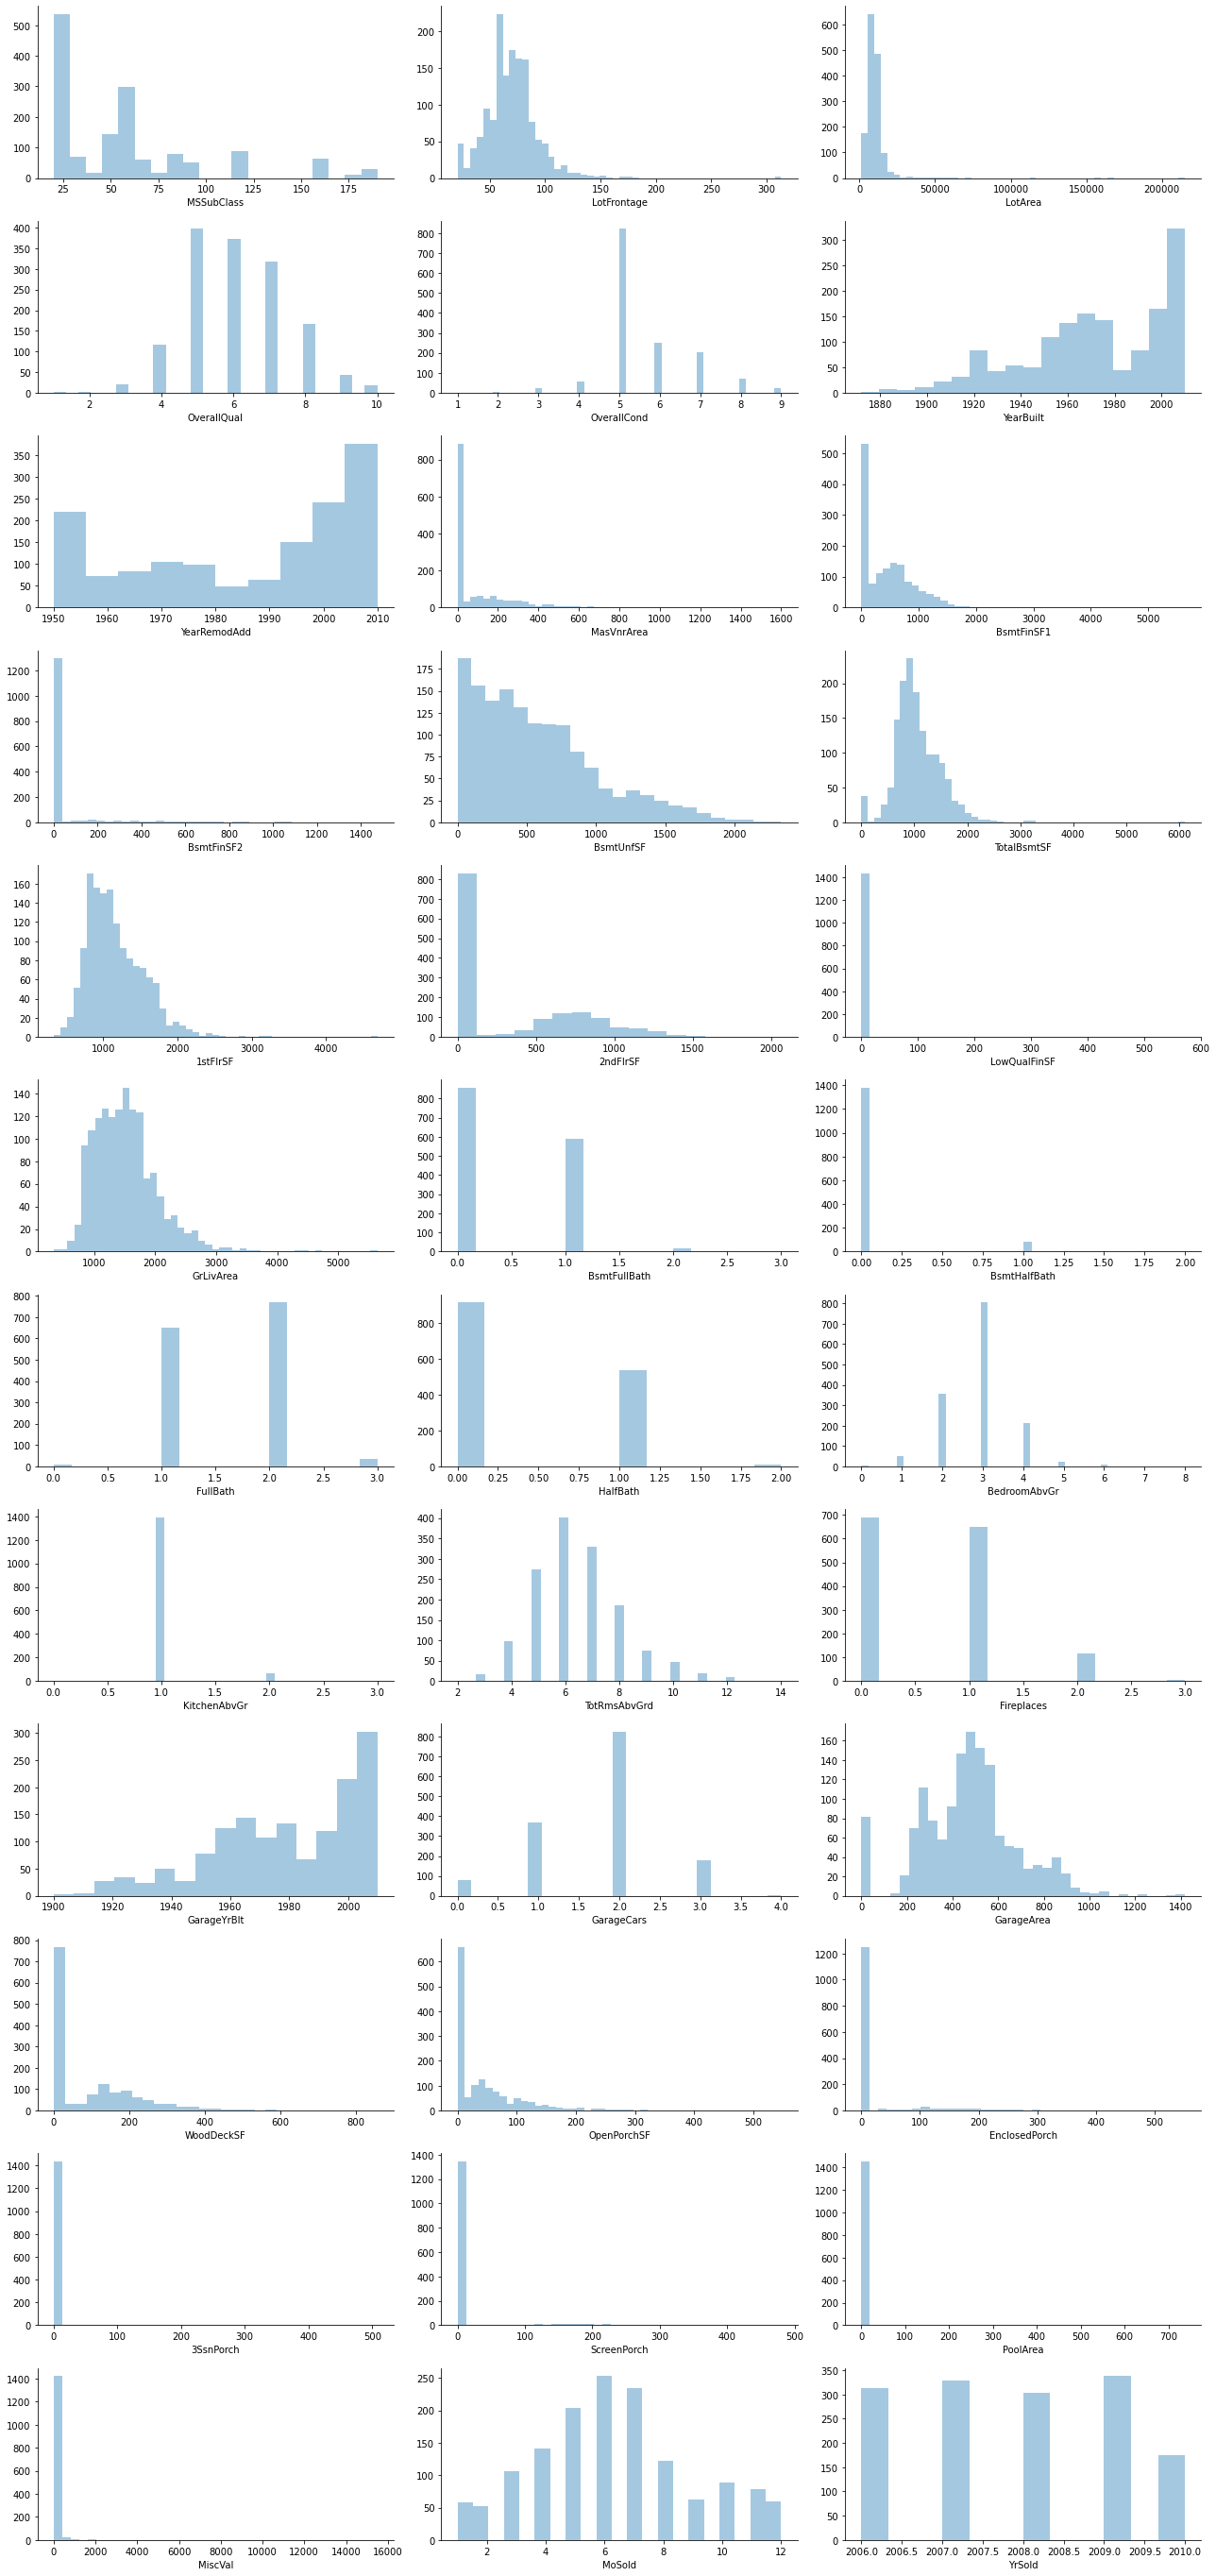

In [1470]:
plt.figure(figsize=[18,38])
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
n=1
for feature in features:
    plt.subplot(12,3,n)
    sns.distplot(working_df[feature], kde=False)
    sns.despine()
    n=n+1
plt.tight_layout()
plt.show()

Let's visualize the scatter plots of categorical variables against the target variable - SalePrice

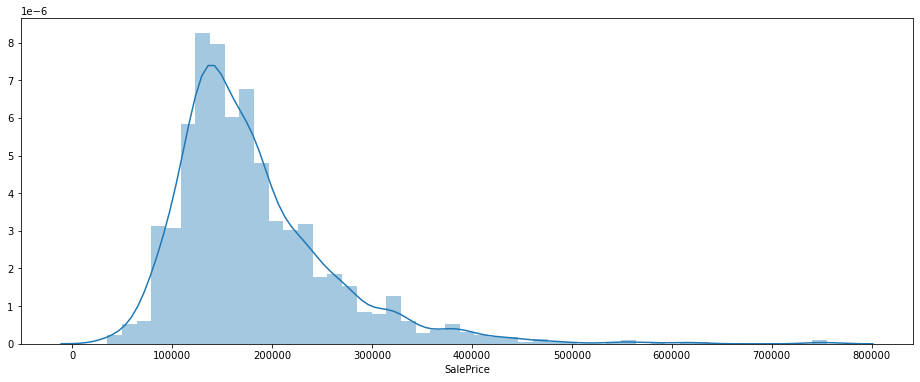

In [1471]:
fig, ax = plt.subplots(figsize=(16,6))
sns.distplot(working_df['SalePrice'])

Looking at the distplot of target variable as above, it can be seen that it is not normally distributed and there are some outliers which are critical from business perspective. Before we proceed with the analysis we need to transform the output variable. We will use natuaral logarithm of the SalePrice to transform it.

In [1472]:
working_df['SalePrice'] = [ln(x) for x in working_df['SalePrice']]

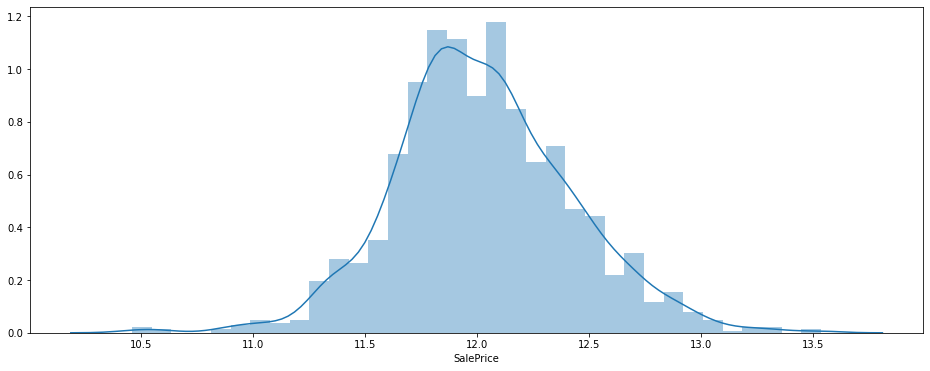

In [1473]:
fig, ax = plt.subplots(figsize=(16,6))
sns.distplot(working_df['SalePrice'])

The above distplot is for the transformed SalePrice which is normally distributed as seen above. 

Let's handle the year column which does not add any value to the the SalePrice, but the age of the property will definetly add some value to our analysis as it is related to the SalePrice

In [1474]:
#Calculate the age of the property when the Sale was made - Year Sold - Year Built
working_df['AgeWhenSold'] = working_df['YrSold']-working_df['YearBuilt']

In [1475]:
#Calculate the total age of the property, i.e number of years since it's built
working_df['YearCurrent'] = datetime.now().year
working_df['AgeToday']= working_df['YearCurrent']- working_df['YearBuilt']

In [1476]:
cols_to_drop = ['MoSold','YrSold','YearBuilt','YearRemodAdd','YearCurrent']
working_df.drop(cols_to_drop,axis=1,inplace=True)

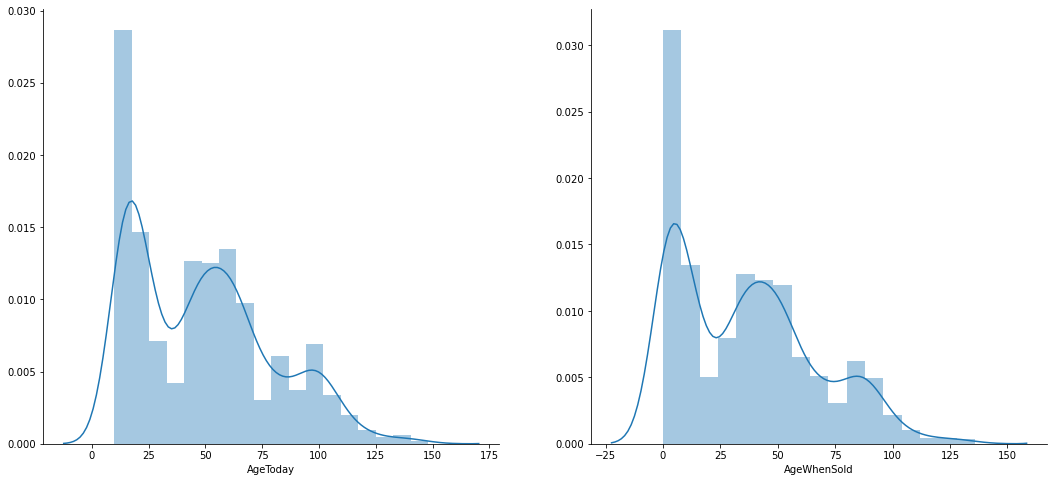

In [1477]:
plt.figure(figsize=[18,8])
features = ['AgeToday','AgeWhenSold']
n=1
for feature in features:
    plt.subplot(1,2,n)
    sns.distplot(working_df[feature])
    sns.despine()
    n=n+1
#plt.tight_layout()
plt.show()

In [1478]:
temporary = working_df.copy()

In [1479]:
#let's find the numeric columns both integer and floating point columns in the dataframe
numeric_cols = temporary.select_dtypes(['int64','float64']).columns
print(numeric_cols)
print(len(numeric_cols))


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeWhenSold',
       'AgeToday'],
      dtype='object')
35


In [1480]:
#Let's scale the numeric columns using StandardScaler.
scaler = StandardScaler()
temporary[numeric_cols]= scaler.fit_transform(temporary[numeric_cols])

In [1481]:
temporary[numeric_cols]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeWhenSold,AgeToday
0,0.073375,-0.214138,-0.207142,0.651479,-0.517200,0.511844,0.575425,-0.288653,-0.944591,-0.459303,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.560068,-1.043259,-1.050994
1,-0.872563,0.415088,-0.091886,-0.071836,2.179628,-0.572624,1.171992,-0.288653,-0.641228,0.466465,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.212764,-0.183465,-0.156734
2,0.073375,-0.088293,0.073480,0.651479,-0.517200,0.323722,0.092907,-0.288653,-0.301643,-0.313369,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.734046,-0.977121,-0.984752
3,0.309859,-0.423880,-0.096897,0.651479,-0.517200,-0.572624,-0.499274,-0.288653,-0.061670,-0.687324,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-0.437382,1.800676,1.863632
4,0.073375,0.582881,0.375148,1.374795,-0.517200,1.363927,0.463568,-0.288653,-0.174865,0.199680,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,1.014651,-0.944052,-0.951632
5,-0.163109,0.624830,0.360616,-0.795151,-0.517200,-0.572624,0.632450,-0.288653,-1.139286,-0.596115,...,-0.432931,-0.251539,-0.359325,10.802446,-0.270208,-0.068692,1.323736,-0.384286,-0.679500,-0.719786
6,-0.872563,0.205346,-0.043379,1.374795,-0.517200,0.456514,2.029558,-0.288653,-0.566519,1.433276,...,1.283007,0.156111,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,1.528999,-1.109397,-1.084115
7,0.073375,0.205346,-0.013513,0.651479,0.381743,0.755297,0.910994,-0.090220,-0.795173,0.113032,...,1.123385,2.375537,3.372372,-0.116339,-0.270208,-0.068692,0.618024,0.455835,-0.018120,-0.057371
8,-0.163109,-0.801415,-0.440659,0.651479,-0.517200,-0.572624,-0.973018,-0.288653,0.871057,-0.240402,...,-0.033876,-0.704483,2.995929,-0.116339,-0.270208,-0.068692,-0.087688,-0.624897,1.337709,1.333700
9,3.147673,-0.843363,-0.310370,-0.795151,0.381743,-0.572624,0.893448,-0.288653,-0.967230,-0.151473,...,-0.752176,-0.644091,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.865510,1.073157,1.068734


We will proceed to add dummies to the categorical variables. 

In [1482]:
#filter the temporary dataframe with columns that are of type object
categorical = temporary.select_dtypes(include=['object'])
print(categorical.columns)
print(len(categorical.columns))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


In [1483]:
#Add the dummies to the categorical features and drop the first column which will help us keep the number of columns to a minimum
categorical_dummies = pd.get_dummies(categorical,drop_first=True)

In [1484]:
#drop the original columns because we now have the dummies which represent them
temporary.drop(categorical.columns,axis=1,inplace=True)

In [1485]:
#concat the two dataframes to merge into one.
temporary = pd.concat([temporary,categorical_dummies],axis=1)

In [1486]:
temporary.shape

(1460, 258)

#### Train-Test-Split

In [1487]:
#Split the dataframe into train and test sets
train,test = train_test_split(temporary, train_size =0.75, test_size = 0.25 , random_state=100)

In [1488]:
train.shape

(1095, 258)

In [1489]:
test.shape

(365, 258)

In [1490]:
#Copying the train and test to the new variables so as to maintain a backup which we may need to use. 
#It saves us the time to load the test and train data on the go. 
master_train = train.copy()
master_test = test.copy()

In [1491]:
train = master_train.copy()
test = master_test.copy()

### Model Building 

There are a total of 258 columns, of which we will select 40 features using RFE for model building. We'll first start off with an arbitrary number of features (40 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [1492]:
#create the yTrain -Target Variable
# and the XTrain which contains all the 257 columns
yTrain = train.pop('SalePrice')
XTrain = train

In [1493]:

#RFE with 40 features
lm = LinearRegression()
rfe = RFE(lm,40)

#fit with 40 features
rfe.fit(XTrain,yTrain)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=40, step=1, verbose=0)

In [1494]:
import statsmodels.api as sm

cols_by_rfe = X.columns[rfe.support_]
print(cols_by_rfe)
print(len(cols_by_rfe))

Index(['OverallQual', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_Veenker', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRNn',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'BsmtExposure_Gd', 'Heating_GasA', 'Heating_GasW', 'CentralAir_Y',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2',
       'Functional_Sev', 'GarageQual_Gd', 'GarageQual_TA', 'PoolQC_Fa',
       'PoolQC_Gd', 'MiscFeature_Othr', 'SaleType_New', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')
40


In [1495]:
XTrainRFE40 = sm.add_constant(XTrain[cols_by_rfe])
XTrainRFE40.head()

,const,OverallQual,GrLivArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_Veenker,...,Functional_Maj2,Functional_Sev,GarageQual_Gd,GarageQual_TA,PoolQC_Fa,PoolQC_Gd,MiscFeature_Othr,SaleType_New,SaleCondition_Normal,SaleCondition_Partial
774,1.0,1.374795,0.870999,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
92,1.0,-0.795151,-1.049806,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
360,1.0,-0.071836,-1.148797,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
549,1.0,0.651479,1.101344,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
546,1.0,-0.071836,0.227558,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [1496]:
#Fitting the model with 40 variables
lm40 = sm.OLS(yTrain,XTrainRFE40).fit()
print(lm40.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     193.4
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:15   Log-Likelihood:                -391.80
No. Observations:                1095   AIC:                             863.6
Df Residuals:                    1055   BIC:                             1064.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.56

Befor we make the predictions on the train and test data, let's take a look at the variance inflation factor of all the feature variables

In [1497]:
#creating a data frame that contains all the feature names and their respective VIF values
vif = pd.DataFrame()
vif['Features']  =XTrainRFE40.columns
vif['VIF'] = [variance_inflation_factor(XTrainRFE40.values, i) for i in range(XTrainRFE40.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\python38\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
40,SaleCondition_Partial,inf
38,SaleType_New,inf
0,const,1755.41
5,MSZoning_RL,29.59
6,MSZoning_RM,22.86
16,RoofMatl_CompShg,18.77
3,MSZoning_FV,8.39
19,RoofMatl_Tar&Grv,7.37
30,KitchenQual_TA,6.84
21,RoofMatl_WdShngl,6.05


Notice that VIFs for some of the feature variables is infinity. Manual elimination is time consuming and is not recommended, so we will build another model with top 30 features

In [1498]:
#RFE with 30 features
lm = LinearRegression()
rfe30 = RFE(lm,30)
rfe30.fit(XTrain,yTrain)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=30, step=1, verbose=0)

In [1499]:
#subset the features selected by rfe30
cols30 = XTrain.columns[rfe30.support_]
XTrainRFE30 = sm.add_constant(XTrain[cols30])

lm30 = sm.OLS(yTrain,XTrainRFE30).fit()
lm30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     219.6
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:36   Log-Likelihood:                -460.24
No. Observations:                1095   AIC:                             982.5
Df Residuals:                    1064   BIC:                             1137.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.2670      0.314     -7.209      0.000      -2.884      -1.650
OverallQual               0.3873      0.017     22.204      0.000       0.353       0.421
GrLivArea                 0.3986      0.015     26.595      0.000       0.369       0.428
MSZoning_FV               1.0312      0.159      6.494      0.000       0.720       1.343
MSZoning_RH               0.8886      0.178      4.983      0.000       0.539       1.239
MSZoning_RL               1.0842      0.148      7.333      0.000       0.794       1.374
MSZoning_RM               0.6642      0.149      4.470      0.000       0.373       0.956
Neighborhood_BrDale      -0.4037      0.113     -3.569      0.000      -0.626      -0.182
Condition2_Feedr          0.3888      0.244      1.595      0.111      -0.090       0.867
Condition2_Norm           0.4796      0.188      2.549      0.011       0.110       0.849
Condition2_PosN          -3.6770      0.427     -8.618      0.000      -4.514      -2.840
Condition2_RRNn           1.0533      0.420      2.510      0.012       0.230       1.877
RoofStyle_Shed            0.4955      0.298      1.662      0.097      -0.089       1.080
RoofMatl_CompShg          0.3754      0.179      2.100      0.036       0.025       0.726
RoofMatl_Membran          0.8285      0.416      1.989      0.047       0.011       1.646
RoofMatl_Metal            0.6571      0.417      1.576      0.115      -0.161       1.475
RoofMatl_Tar&Grv          0.5978      0.254      2.358      0.019       0.100       1.095
RoofMatl_WdShngl          0.4966      0.246      2.022      0.043       0.015       0.978
Exterior1st_BrkComm      -1.2179      0.285     -4.277      0.000      -1.777      -0.659
Exterior1st_CBlock       -0.4193      0.375     -1.119      0.263      -1.154       0.316
BsmtExposure_Gd           0.3815      0.042      9.172      0.000       0.300       0.463
Heating_GasW              0.4064      0.109      3.731      0.000       0.193       0.620
CentralAir_Y              0.5047      0.052      9.712      0.000       0.403       0.607
KitchenQual_Fa           -0.3669      0.078     -4.677      0.000      -0.521      -0.213
KitchenQual_TA           -0.2200      0.029     -7.489      0.000      -0.278      -0.162
Functional_Maj2          -0.7576      0.219     -3.458      0.001      -1.187      -0.328
Functional_Sev           -1.4497      0.416     -3.485      0.001      -2.266      -0.634
GarageQual_Gd             0.2619      0.133      1.975      0.048       0.002       0.522
PoolQC_Gd                -4.8743      0.425    -11.457      0.000      -5.709      -4.040
MiscFeature_Othr         -0.3901      0.267     -1.460      0.145      -0.914       0.134
SaleCondition_Partial     0.3646      0.046      7.875      0.000       0.274       0.455
=======================

In [1500]:
#creating a data frame that contains all the feature names and their respective VIF values
vif = pd.DataFrame()
vif['Features']  =XTrainRFE30.columns
vif['VIF'] = [variance_inflation_factor(XTrainRFE30.values, i) for i in range(XTrainRFE30.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,775.36
5,MSZoning_RL,28.53
6,MSZoning_RM,22.04
3,MSZoning_FV,8.12
13,RoofMatl_CompShg,4.27
9,Condition2_Norm,3.26
4,MSZoning_RH,2.92
16,RoofMatl_Tar&Grv,2.75
8,Condition2_Feedr,2.54
1,OverallQual,2.38


VIFs and p- values are manageable and we can retort to manual elimination of features until there are no features left with pvalue greater than 0.05(alpha=5%) or VIFs greater than 5. <br>. We will eliminate features one by one in the next few cells and creating a model and running the VIF dataset again to analyse further

In [1501]:
XTrainRFE29=sm.add_constant(XTrainRFE30.drop(['Exterior1st_CBlock'], axis=1))
lm29 = sm.OLS(yTrain,XTrainRFE29).fit()
lm29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     227.0
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:37   Log-Likelihood:                -460.88
No. Observations:                1095   AIC:                             981.8
Df Residuals:                    1065   BIC:                             1132.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.2636      0.314     -7.198      0.000      -2.881      -1.646
OverallQual               0.3882      0.017     22.280      0.000       0.354       0.422
GrLivArea                 0.3982      0.015     26.572      0.000       0.369       0.428
MSZoning_FV               1.0301      0.159      6.487      0.000       0.719       1.342
MSZoning_RH               0.8884      0.178      4.982      0.000       0.538       1.238
MSZoning_RL               1.0832      0.148      7.326      0.000       0.793       1.373
MSZoning_RM               0.6639      0.149      4.468      0.000       0.372       0.955
Neighborhood_BrDale      -0.4039      0.113     -3.570      0.000      -0.626      -0.182
Condition2_Feedr          0.3876      0.244      1.590      0.112      -0.091       0.866
Condition2_Norm           0.4783      0.188      2.542      0.011       0.109       0.847
Condition2_PosN          -3.6776      0.427     -8.619      0.000      -4.515      -2.840
Condition2_RRNn           1.0522      0.420      2.507      0.012       0.229       1.876
RoofStyle_Shed            0.4956      0.298      1.662      0.097      -0.089       1.081
RoofMatl_CompShg          0.3748      0.179      2.097      0.036       0.024       0.726
RoofMatl_Membran          0.8277      0.417      1.987      0.047       0.010       1.645
RoofMatl_Metal            0.6567      0.417      1.575      0.115      -0.161       1.475
RoofMatl_Tar&Grv          0.5980      0.254      2.359      0.019       0.100       1.096
RoofMatl_WdShngl          0.4958      0.246      2.019      0.044       0.014       0.978
Exterior1st_BrkComm      -1.2174      0.285     -4.274      0.000      -1.776      -0.659
BsmtExposure_Gd           0.3815      0.042      9.172      0.000       0.300       0.463
Heating_GasW              0.4064      0.109      3.731      0.000       0.193       0.620
CentralAir_Y              0.5037      0.052      9.693      0.000       0.402       0.606
KitchenQual_Fa           -0.3665      0.078     -4.672      0.000      -0.520      -0.213
KitchenQual_TA           -0.2202      0.029     -7.496      0.000      -0.278      -0.163
Functional_Maj2          -0.7573      0.219     -3.457      0.001      -1.187      -0.327
Functional_Sev           -1.4492      0.416     -3.484      0.001      -2.265      -0.633
GarageQual_Gd             0.2616      0.133      1.972      0.049       0.001       0.522
PoolQC_Gd                -4.8736      0.425    -11.454      0.000      -5.708      -4.039
MiscFeature_Othr         -0.3897      0.267     -1.458      0.145      -0.914       0.135
SaleCondition_Partial     0.3643      0.046      7.867      0.000       0.273       0.455
==============================================================================
Omnibus:                       72.

In [1502]:
XTrainRFE28=sm.add_constant(XTrainRFE29.drop(['MiscFeature_Othr'], axis=1))
lm28 = sm.OLS(yTrain,XTrainRFE28).fit()
lm28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     234.8
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:37   Log-Likelihood:                -461.97
No. Observations:                1095   AIC:                             981.9
Df Residuals:                    1066   BIC:                             1127.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.2610      0.315     -7.186      0.000      -2.878      -1.644
OverallQual               0.3885      0.017     22.289      0.000       0.354       0.423
GrLivArea                 0.3982      0.015     26.559      0.000       0.369       0.428
MSZoning_FV               1.0250      0.159      6.453      0.000       0.713       1.337
MSZoning_RH               0.8864      0.178      4.968      0.000       0.536       1.237
MSZoning_RL               1.0782      0.148      7.290      0.000       0.788       1.368
MSZoning_RM               0.6574      0.149      4.423      0.000       0.366       0.949
Neighborhood_BrDale      -0.4021      0.113     -3.553      0.000      -0.624      -0.180
Condition2_Feedr          0.3903      0.244      1.600      0.110      -0.088       0.869
Condition2_Norm           0.4779      0.188      2.539      0.011       0.109       0.847
Condition2_PosN          -3.6788      0.427     -8.617      0.000      -4.517      -2.841
Condition2_RRNn           1.0538      0.420      2.510      0.012       0.230       1.878
RoofStyle_Shed            0.4955      0.298      1.661      0.097      -0.090       1.081
RoofMatl_CompShg          0.3748      0.179      2.096      0.036       0.024       0.726
RoofMatl_Membran          0.8276      0.417      1.986      0.047       0.010       1.645
RoofMatl_Metal            0.6568      0.417      1.575      0.116      -0.162       1.475
RoofMatl_Tar&Grv          0.5995      0.254      2.363      0.018       0.102       1.097
RoofMatl_WdShngl          0.4953      0.246      2.016      0.044       0.013       0.977
Exterior1st_BrkComm      -1.2119      0.285     -4.253      0.000      -1.771      -0.653
BsmtExposure_Gd           0.3817      0.042      9.172      0.000       0.300       0.463
Heating_GasW              0.4100      0.109      3.763      0.000       0.196       0.624
CentralAir_Y              0.5064      0.052      9.746      0.000       0.404       0.608
KitchenQual_Fa           -0.3785      0.078     -4.849      0.000      -0.532      -0.225
KitchenQual_TA           -0.2203      0.029     -7.496      0.000      -0.278      -0.163
Functional_Maj2          -0.7568      0.219     -3.452      0.001      -1.187      -0.327
Functional_Sev           -1.4504      0.416     -3.485      0.001      -2.267      -0.634
GarageQual_Gd             0.2622      0.133      1.976      0.048       0.002       0.522
PoolQC_Gd                -4.8744      0.426    -11.450      0.000      -5.710      -4.039
SaleCondition_Partial     0.3640      0.046      7.858      0.000       0.273       0.455
==============================================================================
Omnibus:                       72.578   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarqu

In [1503]:
XTrainRFE27= sm.add_constant(XTrainRFE28.drop(['RoofMatl_Metal'], axis=1))
lm27 = sm.OLS(yTrain,XTrainRFE27).fit()
lm27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     243.1
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:37   Log-Likelihood:                -463.24
No. Observations:                1095   AIC:                             982.5
Df Residuals:                    1067   BIC:                             1122.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.1243      0.303     -7.019      0.000      -2.718      -1.530
OverallQual               0.3891      0.017     22.313      0.000       0.355       0.423
GrLivArea                 0.3965      0.015     26.496      0.000       0.367       0.426
MSZoning_FV               1.0259      0.159      6.455      0.000       0.714       1.338
MSZoning_RH               0.8873      0.179      4.969      0.000       0.537       1.238
MSZoning_RL               1.0785      0.148      7.287      0.000       0.788       1.369
MSZoning_RM               0.6572      0.149      4.419      0.000       0.365       0.949
Neighborhood_BrDale      -0.4027      0.113     -3.556      0.000      -0.625      -0.180
Condition2_Feedr          0.3739      0.244      1.533      0.126      -0.105       0.852
Condition2_Norm           0.4609      0.188      2.451      0.014       0.092       0.830
Condition2_PosN          -3.6927      0.427     -8.645      0.000      -4.531      -2.855
Condition2_RRNn           1.0356      0.420      2.465      0.014       0.211       1.860
RoofStyle_Shed            0.4258      0.295      1.443      0.149      -0.153       1.005
RoofMatl_CompShg          0.2538      0.162      1.570      0.117      -0.063       0.571
RoofMatl_Membran          0.6996      0.409      1.710      0.087      -0.103       1.502
RoofMatl_Tar&Grv          0.4737      0.241      1.966      0.050       0.001       0.946
RoofMatl_WdShngl          0.3721      0.233      1.596      0.111      -0.085       0.829
Exterior1st_BrkComm      -1.2105      0.285     -4.245      0.000      -1.770      -0.651
BsmtExposure_Gd           0.3878      0.041      9.351      0.000       0.306       0.469
Heating_GasW              0.4112      0.109      3.771      0.000       0.197       0.625
CentralAir_Y              0.5063      0.052      9.736      0.000       0.404       0.608
KitchenQual_Fa           -0.3776      0.078     -4.834      0.000      -0.531      -0.224
KitchenQual_TA           -0.2192      0.029     -7.454      0.000      -0.277      -0.161
Functional_Maj2          -0.7574      0.219     -3.453      0.001      -1.188      -0.327
Functional_Sev           -1.4428      0.416     -3.465      0.001      -2.260      -0.626
GarageQual_Gd             0.2595      0.133      1.955      0.051      -0.001       0.520
PoolQC_Gd                -4.9892      0.420    -11.887      0.000      -5.813      -4.166
SaleCondition_Partial     0.3644      0.046      7.859      0.000       0.273       0.455
==============================================================================
Omnibus:                       71.704   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.295
Skew:                          -0.534   Prob(JB):       

In [1504]:
XTrainRFE26= sm.add_constant(XTrainRFE27.drop(['RoofStyle_Shed'], axis=1))
lm26 = sm.OLS(yTrain,XTrainRFE26).fit()
lm26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     252.1
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:37   Log-Likelihood:                -464.31
No. Observations:                1095   AIC:                             982.6
Df Residuals:                    1068   BIC:                             1118.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.9605      0.281     -6.985      0.000      -2.511      -1.410
OverallQual               0.3886      0.017     22.277      0.000       0.354       0.423
GrLivArea                 0.3968      0.015     26.503      0.000       0.367       0.426
MSZoning_FV               1.0266      0.159      6.455      0.000       0.715       1.339
MSZoning_RH               0.8877      0.179      4.969      0.000       0.537       1.238
MSZoning_RL               1.0789      0.148      7.286      0.000       0.788       1.369
MSZoning_RM               0.6573      0.149      4.418      0.000       0.365       0.949
Neighborhood_BrDale      -0.4018      0.113     -3.546      0.000      -0.624      -0.179
Condition2_Feedr          0.2806      0.235      1.193      0.233      -0.181       0.742
Condition2_Norm           0.3674      0.177      2.080      0.038       0.021       0.714
Condition2_PosN          -3.7900      0.422     -8.982      0.000      -4.618      -2.962
Condition2_RRNn           0.9428      0.415      2.270      0.023       0.128       1.758
RoofMatl_CompShg          0.1839      0.154      1.192      0.233      -0.119       0.487
RoofMatl_Membran          0.6272      0.406      1.544      0.123      -0.170       1.424
RoofMatl_Tar&Grv          0.4006      0.236      1.700      0.089      -0.062       0.863
RoofMatl_WdShngl          0.2995      0.228      1.316      0.189      -0.147       0.746
Exterior1st_BrkComm      -1.2090      0.285     -4.238      0.000      -1.769      -0.649
BsmtExposure_Gd           0.3913      0.041      9.447      0.000       0.310       0.473
Heating_GasW              0.4109      0.109      3.767      0.000       0.197       0.625
CentralAir_Y              0.5058      0.052      9.723      0.000       0.404       0.608
KitchenQual_Fa           -0.3785      0.078     -4.843      0.000      -0.532      -0.225
KitchenQual_TA           -0.2200      0.029     -7.480      0.000      -0.278      -0.162
Functional_Maj2          -0.7569      0.219     -3.449      0.001      -1.188      -0.326
Functional_Sev           -1.4396      0.417     -3.455      0.001      -2.257      -0.622
GarageQual_Gd             0.2385      0.132      1.807      0.071      -0.021       0.498
PoolQC_Gd                -5.0633      0.417    -12.149      0.000      -5.881      -4.246
SaleCondition_Partial     0.3641      0.046      7.850      0.000       0.273       0.455
==============================================================================
Omnibus:                       71.140   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.703
Skew:                          -0.533   Prob(JB):                     4.99e-23
Kurtosis:                       4.056   Cond. No.                  

In [1505]:
XTrainRFE25= sm.add_constant(XTrainRFE26.drop(['RoofMatl_CompShg'], axis=1))
lm25 = sm.OLS(yTrain,XTrainRFE25).fit()
lm25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     262.0
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:37   Log-Likelihood:                -465.04
No. Observations:                1095   AIC:                             982.1
Df Residuals:                    1069   BIC:                             1112.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7747      0.234     -7.600      0.000      -2.233      -1.317
OverallQual               0.3888      0.017     22.288      0.000       0.355       0.423
GrLivArea                 0.3954      0.015     26.483      0.000       0.366       0.425
MSZoning_FV               1.0267      0.159      6.455      0.000       0.715       1.339
MSZoning_RH               0.8887      0.179      4.974      0.000       0.538       1.239
MSZoning_RL               1.0787      0.148      7.283      0.000       0.788       1.369
MSZoning_RM               0.6579      0.149      4.421      0.000       0.366       0.950
Neighborhood_BrDale      -0.4023      0.113     -3.549      0.000      -0.625      -0.180
Condition2_Feedr          0.2794      0.235      1.187      0.235      -0.182       0.741
Condition2_Norm           0.3656      0.177      2.069      0.039       0.019       0.712
Condition2_PosN          -3.7820      0.422     -8.962      0.000      -4.610      -2.954
Condition2_RRNn           0.9401      0.415      2.263      0.024       0.125       1.755
RoofMatl_Membran          0.4471      0.377      1.186      0.236      -0.293       1.187
RoofMatl_Tar&Grv          0.2204      0.181      1.219      0.223      -0.134       0.575
RoofMatl_WdShngl          0.1205      0.171      0.704      0.482      -0.215       0.456
Exterior1st_BrkComm      -1.2113      0.285     -4.245      0.000      -1.771      -0.651
BsmtExposure_Gd           0.3884      0.041      9.392      0.000       0.307       0.470
Heating_GasW              0.4123      0.109      3.779      0.000       0.198       0.626
CentralAir_Y              0.5052      0.052      9.710      0.000       0.403       0.607
KitchenQual_Fa           -0.3787      0.078     -4.845      0.000      -0.532      -0.225
KitchenQual_TA           -0.2208      0.029     -7.505      0.000      -0.278      -0.163
Functional_Maj2          -0.7567      0.220     -3.447      0.001      -1.187      -0.326
Functional_Sev           -1.4396      0.417     -3.454      0.001      -2.257      -0.622
GarageQual_Gd             0.2401      0.132      1.818      0.069      -0.019       0.499
PoolQC_Gd                -5.2350      0.391    -13.383      0.000      -6.003      -4.467
SaleCondition_Partial     0.3654      0.046      7.878      0.000       0.274       0.456
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.176
Skew:                          -0.532   Prob(JB):                     1.07e-22
Kurtosis:                       4.043   Cond. No.                         86.3
==============================================================================

In [1506]:
XTrainRFE24= sm.add_constant(XTrainRFE25.drop(['RoofMatl_WdShngl'], axis=1))
lm24 = sm.OLS(yTrain,XTrainRFE24).fit()
lm24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     273.0
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:37   Log-Likelihood:                -465.29
No. Observations:                1095   AIC:                             980.6
Df Residuals:                    1070   BIC:                             1106.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7740      0.233     -7.599      0.000      -2.232      -1.316
OverallQual               0.3892      0.017     22.321      0.000       0.355       0.423
GrLivArea                 0.3961      0.015     26.585      0.000       0.367       0.425
MSZoning_FV               1.0261      0.159      6.453      0.000       0.714       1.338
MSZoning_RH               0.8880      0.179      4.971      0.000       0.537       1.239
MSZoning_RL               1.0782      0.148      7.282      0.000       0.788       1.369
MSZoning_RM               0.6572      0.149      4.418      0.000       0.365       0.949
Neighborhood_BrDale      -0.4018      0.113     -3.546      0.000      -0.624      -0.180
Condition2_Feedr          0.2794      0.235      1.188      0.235      -0.182       0.741
Condition2_Norm           0.3658      0.177      2.071      0.039       0.019       0.712
Condition2_PosN          -3.7901      0.422     -8.987      0.000      -4.618      -2.963
Condition2_RRNn           0.9413      0.415      2.266      0.024       0.126       1.756
RoofMatl_Membran          0.4422      0.377      1.173      0.241      -0.297       1.182
RoofMatl_Tar&Grv          0.2164      0.181      1.197      0.231      -0.138       0.571
Exterior1st_BrkComm      -1.2083      0.285     -4.236      0.000      -1.768      -0.649
BsmtExposure_Gd           0.3928      0.041      9.610      0.000       0.313       0.473
Heating_GasW              0.4114      0.109      3.772      0.000       0.197       0.625
CentralAir_Y              0.5050      0.052      9.708      0.000       0.403       0.607
KitchenQual_Fa           -0.3784      0.078     -4.843      0.000      -0.532      -0.225
KitchenQual_TA           -0.2205      0.029     -7.500      0.000      -0.278      -0.163
Functional_Maj2          -0.7565      0.219     -3.447      0.001      -1.187      -0.326
Functional_Sev           -1.4371      0.417     -3.449      0.001      -2.255      -0.620
GarageQual_Gd             0.2387      0.132      1.808      0.071      -0.020       0.498
PoolQC_Gd                -5.2445      0.391    -13.418      0.000      -6.011      -4.478
SaleCondition_Partial     0.3641      0.046      7.859      0.000       0.273       0.455
==============================================================================
Omnibus:                       70.704   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.455
Skew:                          -0.533   Prob(JB):                     9.32e-23
Kurtosis:                       4.043   Cond. No.                         86.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [1507]:

XTrainRFE23= sm.add_constant(XTrainRFE24.drop(['RoofMatl_Membran'], axis=1))
lm23 = sm.OLS(yTrain,XTrainRFE23).fit()
lm23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     284.8
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:37   Log-Likelihood:                -466.00
No. Observations:                1095   AIC:                             980.0
Df Residuals:                    1071   BIC:                             1100.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7744      0.234     -7.599      0.000      -2.233      -1.316
OverallQual               0.3899      0.017     22.376      0.000       0.356       0.424
GrLivArea                 0.3957      0.015     26.560      0.000       0.366       0.425
MSZoning_FV               1.0262      0.159      6.452      0.000       0.714       1.338
MSZoning_RH               0.8877      0.179      4.969      0.000       0.537       1.238
MSZoning_RL               1.0781      0.148      7.280      0.000       0.788       1.369
MSZoning_RM               0.6566      0.149      4.413      0.000       0.365       0.949
Neighborhood_BrDale      -0.4023      0.113     -3.550      0.000      -0.625      -0.180
Condition2_Feedr          0.2790      0.235      1.186      0.236      -0.183       0.741
Condition2_Norm           0.3654      0.177      2.068      0.039       0.019       0.712
Condition2_PosN          -3.7932      0.422     -8.993      0.000      -4.621      -2.966
Condition2_RRNn           0.9405      0.415      2.264      0.024       0.126       1.756
RoofMatl_Tar&Grv          0.2125      0.181      1.176      0.240      -0.142       0.567
Exterior1st_BrkComm      -1.2063      0.285     -4.229      0.000      -1.766      -0.647
BsmtExposure_Gd           0.3972      0.041      9.758      0.000       0.317       0.477
Heating_GasW              0.4113      0.109      3.770      0.000       0.197       0.625
CentralAir_Y              0.5050      0.052      9.706      0.000       0.403       0.607
KitchenQual_Fa           -0.3770      0.078     -4.825      0.000      -0.530      -0.224
KitchenQual_TA           -0.2188      0.029     -7.450      0.000      -0.276      -0.161
Functional_Maj2          -0.7572      0.220     -3.449      0.001      -1.188      -0.326
Functional_Sev           -1.4334      0.417     -3.440      0.001      -2.251      -0.616
GarageQual_Gd             0.2381      0.132      1.804      0.072      -0.021       0.497
PoolQC_Gd                -5.2465      0.391    -13.421      0.000      -6.014      -4.479
SaleCondition_Partial     0.3637      0.046      7.848      0.000       0.273       0.455
==============================================================================
Omnibus:                       70.702   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.247
Skew:                          -0.534   Prob(JB):                     1.03e-22
Kurtosis:                       4.039   Cond. No.                         86.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1508]:
XTrainRFE22= sm.add_constant(XTrainRFE23.drop(['RoofMatl_Tar&Grv'], axis=1))
lm22 = sm.OLS(yTrain,XTrainRFE22).fit()
lm22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     297.5
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:37   Log-Likelihood:                -466.70
No. Observations:                1095   AIC:                             979.4
Df Residuals:                    1072   BIC:                             1094.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7791      0.234     -7.619      0.000      -2.237      -1.321
OverallQual               0.3886      0.017     22.343      0.000       0.354       0.423
GrLivArea                 0.3962      0.015     26.599      0.000       0.367       0.425
MSZoning_FV               1.0303      0.159      6.478      0.000       0.718       1.342
MSZoning_RH               0.8899      0.179      4.980      0.000       0.539       1.240
MSZoning_RL               1.0812      0.148      7.301      0.000       0.791       1.372
MSZoning_RM               0.6586      0.149      4.426      0.000       0.367       0.951
Neighborhood_BrDale      -0.4011      0.113     -3.538      0.000      -0.623      -0.179
Condition2_Feedr          0.2801      0.235      1.190      0.234      -0.182       0.742
Condition2_Norm           0.3662      0.177      2.072      0.038       0.019       0.713
Condition2_PosN          -3.8007      0.422     -9.010      0.000      -4.628      -2.973
Condition2_RRNn           0.9419      0.415      2.267      0.024       0.127       1.757
Exterior1st_BrkComm      -1.1064      0.272     -4.062      0.000      -1.641      -0.572
BsmtExposure_Gd           0.4062      0.040     10.159      0.000       0.328       0.485
Heating_GasW              0.4189      0.109      3.846      0.000       0.205       0.633
CentralAir_Y              0.5058      0.052      9.722      0.000       0.404       0.608
KitchenQual_Fa           -0.3742      0.078     -4.790      0.000      -0.528      -0.221
KitchenQual_TA           -0.2187      0.029     -7.445      0.000      -0.276      -0.161
Functional_Maj2          -0.7593      0.220     -3.459      0.001      -1.190      -0.329
Functional_Sev           -1.2218      0.376     -3.250      0.001      -1.959      -0.484
GarageQual_Gd             0.2383      0.132      1.805      0.071      -0.021       0.497
PoolQC_Gd                -5.2556      0.391    -13.445      0.000      -6.023      -4.489
SaleCondition_Partial     0.3638      0.046      7.849      0.000       0.273       0.455
==============================================================================
Omnibus:                       70.515   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.966
Skew:                          -0.525   Prob(JB):                     4.38e-23
Kurtosis:                       4.074   Cond. No.                         86.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1509]:
XTrainRFE21= sm.add_constant(XTrainRFE22.drop(['Condition2_Feedr'], axis=1))
lm21 = sm.OLS(yTrain,XTrainRFE21).fit()
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     311.5
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:37   Log-Likelihood:                -467.43
No. Observations:                1095   AIC:                             978.9
Df Residuals:                    1073   BIC:                             1089.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6019      0.180     -8.904      0.000      -1.955      -1.249
OverallQual               0.3898      0.017     22.452      0.000       0.356       0.424
GrLivArea                 0.3952      0.015     26.569      0.000       0.366       0.424
MSZoning_FV               1.0130      0.158      6.395      0.000       0.702       1.324
MSZoning_RH               0.8729      0.178      4.900      0.000       0.523       1.222
MSZoning_RL               1.0644      0.147      7.218      0.000       0.775       1.354
MSZoning_RM               0.6438      0.148      4.341      0.000       0.353       0.935
Neighborhood_BrDale      -0.4032      0.113     -3.557      0.000      -0.626      -0.181
Condition2_Norm           0.2087      0.117      1.782      0.075      -0.021       0.439
Condition2_PosN          -3.9550      0.402     -9.850      0.000      -4.743      -3.167
Condition2_RRNn           0.7826      0.393      1.990      0.047       0.011       1.554
Exterior1st_BrkComm      -1.1060      0.272     -4.060      0.000      -1.641      -0.571
BsmtExposure_Gd           0.4063      0.040     10.159      0.000       0.328       0.485
Heating_GasW              0.4158      0.109      3.818      0.000       0.202       0.630
CentralAir_Y              0.5027      0.052      9.672      0.000       0.401       0.605
KitchenQual_Fa           -0.3721      0.078     -4.763      0.000      -0.525      -0.219
KitchenQual_TA           -0.2190      0.029     -7.453      0.000      -0.277      -0.161
Functional_Maj2          -0.7595      0.220     -3.459      0.001      -1.190      -0.329
Functional_Sev           -1.2196      0.376     -3.244      0.001      -1.957      -0.482
GarageQual_Gd             0.2025      0.129      1.575      0.116      -0.050       0.455
PoolQC_Gd                -5.2507      0.391    -13.430      0.000      -6.018      -4.484
SaleCondition_Partial     0.3631      0.046      7.834      0.000       0.272       0.454
==============================================================================
Omnibus:                       70.135   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.603
Skew:                          -0.519   Prob(JB):                     3.18e-23
Kurtosis:                       4.092   Cond. No.                         72.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1510]:
XTrainRFE20= sm.add_constant(XTrainRFE21.drop(['GarageQual_Gd'], axis=1))
lm20 = sm.OLS(yTrain,XTrainRFE20).fit()
lm20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     326.5
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:38   Log-Likelihood:                -468.69
No. Observations:                1095   AIC:                             979.4
Df Residuals:                    1074   BIC:                             1084.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5682      0.179     -8.773      0.000      -1.919      -1.217
OverallQual               0.3912      0.017     22.540      0.000       0.357       0.425
GrLivArea                 0.3961      0.015     26.629      0.000       0.367       0.425
MSZoning_FV               1.0160      0.158      6.410      0.000       0.705       1.327
MSZoning_RH               0.8763      0.178      4.916      0.000       0.527       1.226
MSZoning_RL               1.0688      0.148      7.245      0.000       0.779       1.358
MSZoning_RM               0.6506      0.148      4.385      0.000       0.360       0.942
Neighborhood_BrDale      -0.4061      0.113     -3.581      0.000      -0.629      -0.184
Condition2_Norm           0.1737      0.115      1.509      0.131      -0.052       0.400
Condition2_PosN          -3.9973      0.401     -9.971      0.000      -4.784      -3.211
Condition2_RRNn           0.7460      0.393      1.898      0.058      -0.025       1.517
Exterior1st_BrkComm      -1.1033      0.273     -4.047      0.000      -1.638      -0.568
BsmtExposure_Gd           0.4060      0.040     10.145      0.000       0.327       0.485
Heating_GasW              0.4127      0.109      3.787      0.000       0.199       0.626
CentralAir_Y              0.5006      0.052      9.628      0.000       0.399       0.603
KitchenQual_Fa           -0.3737      0.078     -4.781      0.000      -0.527      -0.220
KitchenQual_TA           -0.2185      0.029     -7.432      0.000      -0.276      -0.161
Functional_Maj2          -0.7607      0.220     -3.462      0.001      -1.192      -0.330
Functional_Sev           -1.2225      0.376     -3.249      0.001      -1.961      -0.484
PoolQC_Gd                -5.2596      0.391    -13.445      0.000      -6.027      -4.492
SaleCondition_Partial     0.3606      0.046      7.778      0.000       0.270       0.452
==============================================================================
Omnibus:                       70.443   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.343
Skew:                          -0.523   Prob(JB):                     3.63e-23
Kurtosis:                       4.081   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1511]:
XTrainRFE19 = sm.add_constant(XTrainRFE20.drop(['Condition2_Norm'],axis=1))

In [1512]:
lm19 = sm.OLS(yTrain,XTrainRFE19).fit()
lm19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     343.2
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:38   Log-Likelihood:                -469.85
No. Observations:                1095   AIC:                             979.7
Df Residuals:                    1075   BIC:                             1080.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.4179      0.149     -9.546      0.000      -1.709      -1.126
OverallQual               0.3917      0.017     22.565      0.000       0.358       0.426
GrLivArea                 0.3943      0.015     26.576      0.000       0.365       0.423
MSZoning_FV               1.0392      0.158      6.583      0.000       0.729       1.349
MSZoning_RH               0.9019      0.178      5.080      0.000       0.554       1.250
MSZoning_RL               1.0917      0.147      7.436      0.000       0.804       1.380
MSZoning_RM               0.6702      0.148      4.532      0.000       0.380       0.960
Neighborhood_BrDale      -0.4019      0.113     -3.542      0.000      -0.624      -0.179
Condition2_PosN          -4.1638      0.386    -10.797      0.000      -4.920      -3.407
Condition2_RRNn           0.5760      0.377      1.529      0.126      -0.163       1.315
Exterior1st_BrkComm      -1.1035      0.273     -4.045      0.000      -1.639      -0.568
BsmtExposure_Gd           0.4076      0.040     10.182      0.000       0.329       0.486
Heating_GasW              0.4188      0.109      3.843      0.000       0.205       0.633
CentralAir_Y              0.5006      0.052      9.623      0.000       0.399       0.603
KitchenQual_Fa           -0.3776      0.078     -4.831      0.000      -0.531      -0.224
KitchenQual_TA           -0.2203      0.029     -7.495      0.000      -0.278      -0.163
Functional_Maj2          -0.7597      0.220     -3.456      0.001      -1.191      -0.328
Functional_Sev           -1.2174      0.376     -3.234      0.001      -1.956      -0.479
PoolQC_Gd                -5.2492      0.391    -13.413      0.000      -6.017      -4.481
SaleCondition_Partial     0.3610      0.046      7.783      0.000       0.270       0.452
==============================================================================
Omnibus:                       68.389   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.782
Skew:                          -0.521   Prob(JB):                     5.85e-22
Kurtosis:                       4.029   Cond. No.                         60.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1513]:
XTrainRFE18 = sm.add_constant(XTrainRFE19.drop(['Condition2_RRNn'],axis=1))

In [1514]:
lm18 = sm.OLS(yTrain,XTrainRFE18).fit()
lm18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     361.7
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:38   Log-Likelihood:                -471.04
No. Observations:                1095   AIC:                             980.1
Df Residuals:                    1076   BIC:                             1075.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.4190      0.149     -9.548      0.000      -1.711      -1.127
OverallQual               0.3919      0.017     22.562      0.000       0.358       0.426
GrLivArea                 0.3937      0.015     26.529      0.000       0.365       0.423
MSZoning_FV               1.0382      0.158      6.573      0.000       0.728       1.348
MSZoning_RH               0.9014      0.178      5.074      0.000       0.553       1.250
MSZoning_RL               1.0908      0.147      7.425      0.000       0.803       1.379
MSZoning_RM               0.6730      0.148      4.549      0.000       0.383       0.963
Neighborhood_BrDale      -0.4065      0.113     -3.582      0.000      -0.629      -0.184
Condition2_PosN          -4.1604      0.386    -10.782      0.000      -4.918      -3.403
Exterior1st_BrkComm      -1.1030      0.273     -4.041      0.000      -1.639      -0.567
BsmtExposure_Gd           0.4073      0.040     10.169      0.000       0.329       0.486
Heating_GasW              0.4188      0.109      3.842      0.000       0.205       0.633
CentralAir_Y              0.5025      0.052      9.657      0.000       0.400       0.605
KitchenQual_Fa           -0.3773      0.078     -4.824      0.000      -0.531      -0.224
KitchenQual_TA           -0.2197      0.029     -7.470      0.000      -0.277      -0.162
Functional_Maj2          -0.7610      0.220     -3.459      0.001      -1.193      -0.329
Functional_Sev           -1.2168      0.377     -3.230      0.001      -1.956      -0.478
PoolQC_Gd                -5.2447      0.392    -13.393      0.000      -6.013      -4.476
SaleCondition_Partial     0.3612      0.046      7.781      0.000       0.270       0.452
==============================================================================
Omnibus:                       68.180   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.105
Skew:                          -0.521   Prob(JB):                     8.20e-22
Kurtosis:                       4.021   Cond. No.                         60.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally Yes!! we have managed to narrow down the features from 258 to 40 to 30 to 18 for now. Some features can still be eliminated by looking at the VIFs. 

In [1515]:
#creating a data frame that contains all the feature names and their respective VIF values
vif = pd.DataFrame()
vif['Features']  =XTrainRFE18.columns
vif['VIF'] = [variance_inflation_factor(XTrainRFE18.values, i) for i in range(XTrainRFE18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,171.72
5,MSZoning_RL,27.93
6,MSZoning_RM,21.67
3,MSZoning_FV,7.97
4,MSZoning_RH,2.88
1,OverallQual,2.34
2,GrLivArea,1.73
14,KitchenQual_TA,1.68
12,CentralAir_Y,1.36
13,KitchenQual_Fa,1.27


In [1516]:
XTrainRFE17= sm.add_constant(XTrainRFE18.drop(['MSZoning_RM'], axis=1))
lm17 = sm.OLS(yTrain,XTrainRFE17).fit()
lm17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     374.9
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:36:38   Log-Likelihood:                -481.47
No. Observations:                1095   AIC:                             998.9
Df Residuals:                    1077   BIC:                             1089.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.7944      0.057    -13.845      0.000      -0.907      -0.682
OverallQual               0.3966      0.017     22.666      0.000       0.362       0.431
GrLivArea                 0.3924      0.015     26.204      0.000       0.363       0.422
MSZoning_FV               0.3850      0.066      5.801      0.000       0.255       0.515
MSZoning_RH               0.2628      0.110      2.392      0.017       0.047       0.478
MSZoning_RL               0.4406      0.034     12.862      0.000       0.373       0.508
Neighborhood_BrDale      -0.3869      0.114     -3.381      0.001      -0.611      -0.162
Condition2_PosN          -4.1614      0.389    -10.687      0.000      -4.925      -3.397
Exterior1st_BrkComm      -1.0646      0.275     -3.867      0.000      -1.605      -0.524
BsmtExposure_Gd           0.4068      0.040     10.064      0.000       0.327       0.486
Heating_GasW              0.3983      0.110      3.623      0.000       0.183       0.614
CentralAir_Y              0.5286      0.052     10.128      0.000       0.426       0.631
KitchenQual_Fa           -0.3993      0.079     -5.068      0.000      -0.554      -0.245
KitchenQual_TA           -0.2168      0.030     -7.307      0.000      -0.275      -0.159
Functional_Maj2          -0.7402      0.222     -3.335      0.001      -1.176      -0.305
Functional_Sev           -1.2176      0.380     -3.204      0.001      -1.963      -0.472
PoolQC_Gd                -5.2431      0.395    -13.268      0.000      -6.018      -4.468
SaleCondition_Partial     0.3570      0.047      7.624      0.000       0.265       0.449
==============================================================================
Omnibus:                       84.165   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.163
Skew:                          -0.581   Prob(JB):                     5.44e-29
Kurtosis:                       4.226   Cond. No.                         59.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1517]:
#creating a data frame that contains all the feature names and their respective VIF values
vif = pd.DataFrame()
vif['Features']  =XTrainRFE17.columns
vif['VIF'] = [variance_inflation_factor(XTrainRFE17.values, i) for i in range(XTrainRFE17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.14
1,OverallQual,2.33
2,GrLivArea,1.73
13,KitchenQual_TA,1.68
5,MSZoning_RL,1.49
3,MSZoning_FV,1.38
11,CentralAir_Y,1.34
12,KitchenQual_Fa,1.26
17,SaleCondition_Partial,1.17
10,Heating_GasW,1.16


In [1522]:
#using the backup of the test to run the below cells 
test = master_test.copy()

In [1523]:
#let's select the 17RFE columns from our test data set also
cols17 = list(XTrainRFE17.columns)

cols17.remove('const')


yTest = test.pop('SalePrice')
XTest = test

XTest17 = XTest[cols17]

XTest17=sm.add_constant(XTest17)

In [1413]:
#copy the right data into X_train and y_train to apply in the grid search algorithm
X_train = XTrainRFE17
y_train =yTrain

#### Let's use grid search CV for Lasso Regularization as below

In [1526]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1527]:
#printing the cv_results dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005625,0.000380,0.002628,0.000816,0.001,{'alpha': 0.001},0.750302,0.850015,0.774469,0.820371,...,0.804450,0.036533,1,0.846281,0.850814,0.850920,0.857878,0.855586,0.852296,0.004056
1,0.005364,0.000809,0.002008,0.000018,0.01,{'alpha': 0.01},0.744723,0.823317,0.793892,0.810361,...,0.791447,0.026851,2,0.811082,0.789118,0.801689,0.796636,0.796483,0.799001,0.007250
2,0.005270,0.000437,0.001408,0.000784,1,{'alpha': 1.0},-0.039280,-0.010120,-0.004603,-0.005637,...,-0.012018,0.013973,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.006235,0.000778,0.002259,0.000483,5,{'alpha': 5.0},-0.039280,-0.010120,-0.004603,-0.005637,...,-0.012018,0.013973,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.005768,0.001134,0.001880,0.000682,10,{'alpha': 10.0},-0.039280,-0.010120,-0.004603,-0.005637,...,-0.012018,0.013973,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


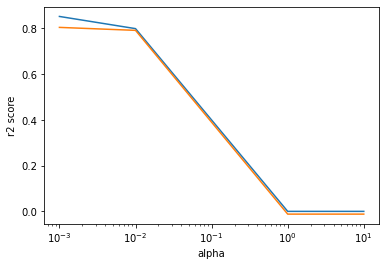

In [1528]:
# plot r2 against alpha for train and test data
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [1529]:
print( model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
0.8044504332859035


Since the best alpha chosen by the model_cv through gridsearch is 0.01 we will implement the Lasso model with alpha = 0.01

In [1546]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(XTrainRFE17, yTrain)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1547]:
# Metrics calculation
y_pred_lasso = lm.predict(XTrainRFE17)
mae = metrics.mean_absolute_error(yTrain, y_pred_lasso)
mse = metrics.mean_squared_error(yTrain, y_pred_lasso)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(yTrain,y_pred_lasso)
print('The various metrics for train data are as follows - ')
print('mae = ',round(mae,5))
print('mse = ',round(mse,5))
print('rmse = ',round(rmse,5))
print('r2_score = ',round(r2,5))


y_pred_lasso = lm.predict(XTest17)
mae = metrics.mean_absolute_error(yTest, y_pred_lasso)
mse = metrics.mean_squared_error(yTest, y_pred_lasso)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(yTest,y_pred_lasso)
print('The various metrics for test data are as follows - ')
print('mae = ',round(mae,5))
print('mse = ',round(mse,5))
print('rmse = ',round(rmse,5))
print('r2_score = ',round(r2,5))

The various metrics for train data are as follows - 
mae =  0.29459
mse =  0.14623
rmse =  0.3824
r2_score =  0.85014
The various metrics for test data are as follows - 
mae =  0.33585
mse =  0.29576
rmse =  0.54384
r2_score =  0.72426


In [1549]:

# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print('The Lasso model parameters are - ')
list(zip(cols, model_parameters))

The Lasso model parameters are - 


[('constant', -0.753),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.409),
 ('LotArea', 0.373),
 ('OverallQual', 0.351),
 ('OverallCond', 0.164),
 ('MasVnrArea', 0.427),
 ('BsmtFinSF1', -0.318),
 ('BsmtFinSF2', -2.917),
 ('BsmtUnfSF', -0.456),
 ('TotalBsmtSF', 0.377),
 ('1stFlrSF', 0.239),
 ('2ndFlrSF', 0.503),
 ('LowQualFinSF', -0.381),
 ('GrLivArea', -0.223),
 ('BsmtFullBath', -0.334),
 ('BsmtHalfBath', -0.087),
 ('FullBath', -3.964),
 ('HalfBath', 0.316)]

#### Subjective Question 1 - 
Let's double the alpha and see the changes in the model metrics - This is done for the subjective question -1

In [1550]:
# lasso regression
lm = Lasso(alpha=0.002)
lm.fit(XTrainRFE17, yTrain)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1551]:
# Metrics calculation
y_pred_lasso = lm.predict(XTrainRFE17)
mae = metrics.mean_absolute_error(yTrain, y_pred_lasso)
mse = metrics.mean_squared_error(yTrain, y_pred_lasso)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(yTrain,y_pred_lasso)
print('The various metrics for train data are as follows - ')
print('mae = ',round(mae,5))
print('mse = ',round(mse,5))
print('rmse = ',round(rmse,5))
print('r2_score = ',round(r2,5))


y_pred_lasso = lm.predict(XTest17)
mae = metrics.mean_absolute_error(yTest, y_pred_lasso)
mse = metrics.mean_squared_error(yTest, y_pred_lasso)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(yTest,y_pred_lasso)
print('The various metrics for test data are as follows - ')
print('mae = ',round(mae,5))
print('mse = ',round(mse,5))
print('rmse = ',round(rmse,5))
print('r2_score = ',round(r2,5))

The various metrics for train data are as follows - 
mae =  0.29894
mse =  0.15754
rmse =  0.39691
r2_score =  0.83856
The various metrics for test data are as follows - 
mae =  0.32616
mse =  0.23032
rmse =  0.47992
r2_score =  0.78527


In [1552]:

# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print('The Lasso model parameters are - ')
list(zip(cols, model_parameters))

The Lasso model parameters are - 


[('constant', -0.715),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.42),
 ('LotArea', 0.357),
 ('OverallQual', 0.32),
 ('OverallCond', 0.063),
 ('MasVnrArea', 0.416),
 ('BsmtFinSF1', -0.249),
 ('BsmtFinSF2', -1.683),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.346),
 ('1stFlrSF', 0.094),
 ('2ndFlrSF', 0.479),
 ('LowQualFinSF', -0.357),
 ('GrLivArea', -0.225),
 ('BsmtFullBath', -0.0),
 ('BsmtHalfBath', -0.0),
 ('FullBath', -2.7),
 ('HalfBath', 0.275)]

#### Let's use grid search CV for Ridge Regularization as below

In [1553]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# Ridge model
model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1537]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005631,0.002587,0.002409,0.000810,0.001,{'alpha': 0.001},0.749280,0.850657,0.754854,0.819750,...,0.801287,0.041414,5,0.849683,0.855544,0.854491,0.862158,0.859042,0.856184,0.004228
1,0.004550,0.000439,0.001475,0.000438,0.01,{'alpha': 0.01},0.749479,0.850647,0.755445,0.819830,...,0.801445,0.041227,4,0.849680,0.855538,0.854487,0.862152,0.859037,0.856179,0.004227
2,0.003892,0.000121,0.001988,0.000026,1,{'alpha': 1.0},0.757381,0.848245,0.781208,0.821960,...,0.807028,0.032944,1,0.843564,0.841588,0.844721,0.848254,0.845960,0.844818,0.002242
3,0.007092,0.001404,0.002417,0.000511,5,{'alpha': 5.0},0.758851,0.844228,0.792737,0.820908,...,0.807018,0.029087,2,0.832682,0.818778,0.827595,0.825450,0.824454,0.825792,0.004513
4,0.006189,0.001173,0.002000,0.001101,10,{'alpha': 10.0},0.757842,0.841971,0.795027,0.819388,...,0.805483,0.028153,3,0.828183,0.810797,0.821028,0.817497,0.817019,0.818905,0.005690


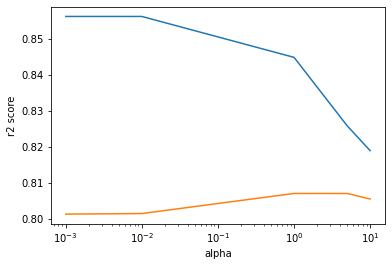

In [1538]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [1554]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1.0}
0.8070278551739634


Since the best alpha chosen by the model_cv through gridsearch is 1.0 we will implement the Lass model with alpha = 1.0

In [1556]:
# lasso regression
lm = Ridge(alpha=1.0)
lm.fit(XTrainRFE17, yTrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1558]:

# Metrics calculation
y_pred_lasso = lm.predict(XTrainRFE17)
mae = metrics.mean_absolute_error(yTrain, y_pred_lasso)
mse = metrics.mean_squared_error(yTrain, y_pred_lasso)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(yTrain,y_pred_lasso)
print('The various metrics for train data are as follows - ')
print('mae = ',round(mae,5))
print('mse = ',round(mse,5))
print('rmse = ',round(rmse,5))
print('r2_score = ',round(r2,5))


y_pred_lasso = lm.predict(XTest17)
mae = metrics.mean_absolute_error(yTest, y_pred_lasso)
mse = metrics.mean_squared_error(yTest, y_pred_lasso)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(yTest,y_pred_lasso)
print('The various metrics for test data are as follows - ')
print('mae = ',round(mae,5))
print('mse = ',round(mse,5))
print('rmse = ',round(rmse,5))
print('r2_score = ',round(r2,5))

The various metrics for train data are as follows - 
mae =  0.29585
mse =  0.15198
rmse =  0.38984
r2_score =  0.84425
The various metrics for test data are as follows - 
mae =  0.32362
mse =  0.21878
rmse =  0.46774
r2_score =  0.79603


In [1559]:
# ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print('The ridge model parameters are - ')
list(zip(cols, model_parameters))

The ridge model parameters are - 


[('constant', -0.771),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.411),
 ('LotArea', 0.354),
 ('OverallQual', 0.38),
 ('OverallCond', 0.252),
 ('MasVnrArea', 0.442),
 ('BsmtFinSF1', -0.377),
 ('BsmtFinSF2', -1.938),
 ('BsmtUnfSF', -0.703),
 ('TotalBsmtSF', 0.366),
 ('1stFlrSF', 0.354),
 ('2ndFlrSF', 0.514),
 ('LowQualFinSF', -0.412),
 ('GrLivArea', -0.233),
 ('BsmtFullBath', -0.549),
 ('BsmtHalfBath', -0.574),
 ('FullBath', -2.443),
 ('HalfBath', 0.294)]

The above cell marks the official end of the Problem Statement - Part 1. Basically, the predictor variables with positive co efficients are most favorable for our target variable 'SalePrice'. So, with the increase in these variables the target will increase, which was the basic business goal for the company

# End

#### Subjective question 1 -
Let's double the alpha and see the changes in the model metrics - This is done for the subjective question -1

In [1560]:
# lasso regression
lm = Ridge(alpha=2.0)
lm.fit(XTrainRFE17, yTrain)

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1562]:


# Metrics calculation
y_pred_lasso = lm.predict(XTrainRFE17)
mae = metrics.mean_absolute_error(yTrain, y_pred_lasso)
mse = metrics.mean_squared_error(yTrain, y_pred_lasso)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(yTrain,y_pred_lasso)
print('The various metrics for train data are as follows - ')
print('mae = ',round(mae,5))
print('mse = ',round(mse,5))
print('rmse = ',round(rmse,5))
print('r2_score = ',round(r2,5))


y_pred_lasso = lm.predict(XTest17)
mae = metrics.mean_absolute_error(yTest, y_pred_lasso)
mse = metrics.mean_squared_error(yTest, y_pred_lasso)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(yTest,y_pred_lasso)
print('The various metrics for test data are as follows - ')
print('mae = ',round(mae,5))
print('mse = ',round(mse,5))
print('rmse = ',round(rmse,5))
print('r2_score = ',round(r2,5))


The various metrics for train data are as follows - 
mae =  0.29808
mse =  0.15991
rmse =  0.39989
r2_score =  0.83613
The various metrics for test data are as follows - 
mae =  0.31764
mse =  0.18981
rmse =  0.43568
r2_score =  0.82303


In [1563]:

# ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print('The ridge model parameters are - ')
list(zip(cols, model_parameters))

The ridge model parameters are - 


[('constant', -0.756),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.416),
 ('LotArea', 0.342),
 ('OverallQual', 0.37),
 ('OverallCond', 0.233),
 ('MasVnrArea', 0.44),
 ('BsmtFinSF1', -0.358),
 ('BsmtFinSF2', -1.263),
 ('BsmtUnfSF', -0.521),
 ('TotalBsmtSF', 0.351),
 ('1stFlrSF', 0.314),
 ('2ndFlrSF', 0.505),
 ('LowQualFinSF', -0.408),
 ('GrLivArea', -0.237),
 ('BsmtFullBath', -0.434),
 ('BsmtHalfBath', -0.376),
 ('FullBath', -1.593),
 ('HalfBath', 0.274)]

### Subjective question 3 Solution

Lasso Regression without the five most important variables - '1stFlrSf','OverallCond','2ndFlrSf','LotFrontage','MasVnrArea'

In [1569]:
working_df_5 = master_df.copy()

In [1570]:
#let's remove the 5 variables from the new dataframe and proceed to build the model
working_df_5.drop(['1stFlrSF','OverallCond','2ndFlrSF','LotFrontage','MasVnrArea'],axis=1,inplace=True)

In [1571]:
working_df_5.loc[working_df_5['Alley'].isnull(),'Alley']= 'No Alley Access'
working_df_5.loc[working_df_5['BsmtQual'].isnull(),'BsmtQual']= 'No Basement'
working_df_5.loc[working_df_5['BsmtCond'].isnull(),'BsmtCond']= 'No Basement'
working_df_5.loc[working_df_5['BsmtExposure'].isnull(),'BsmtExposure']= 'No Basement'
working_df_5.loc[working_df_5['BsmtFinType1'].isnull(),'BsmtFinType1']= 'No Basement'
working_df_5.loc[working_df_5['BsmtFinType2'].isnull(),'BsmtFinType2']= 'No Basement'
working_df_5.loc[working_df_5['FireplaceQu'].isnull(),'FireplaceQu']= 'No Fireplace'
working_df_5.loc[working_df_5['GarageType'].isnull(),'GarageType']= 'No Garage'
working_df_5.loc[working_df_5['GarageFinish'].isnull(),'GarageFinish']= 'No Garage'
working_df_5.loc[working_df_5['GarageQual'].isnull(),'GarageQual']= 'No Garage'
working_df_5.loc[working_df_5['GarageCond'].isnull(),'GarageCond']= 'No Garage'
working_df_5.loc[working_df_5['PoolQC'].isnull(),'PoolQC']= 'No Pool'
working_df_5.loc[working_df_5['Fence'].isnull(),'Fence']= 'No Fence'
working_df_5.loc[working_df_5['MiscFeature'].isnull(),'MiscFeature']= 'None'

In [1573]:

#fill the na values of 'FireplaceQu' column with previous ones
cols_to_impute=['GarageYrBlt','MasVnrType','MasVnrArea','Electrical']

#working_df_5['LotFrontage']=working_df_5['LotFrontage'].fillna(method='pad')
working_df_5['GarageYrBlt']=working_df_5['GarageYrBlt'].fillna(method='pad')
working_df_5['MasVnrType']=working_df_5['MasVnrType'].fillna(method='pad')
#working_df_5['MasVnrArea']=working_df_5['MasVnrArea'].fillna(method='pad')
working_df_5['Electrical']=working_df_5['Electrical'].fillna(method='pad')

#let's drop ID variable which is not releated to the target variable
working_df_5.drop(['Id'],axis=1,inplace=True)

#transform the target variable
working_df_5['SalePrice'] = [ln(x) for x in working_df_5['SalePrice']]

#Calculate the age of the property when the Sale was made - Year Sold - Year Built
working_df_5['AgeWhenSold'] = working_df_5['YrSold']-working_df_5['YearBuilt']

#Calculate the total age of the property, i.e number of years since it's built
working_df_5['YearCurrent'] = datetime.now().year
working_df_5['AgeToday']= working_df_5['YearCurrent']- working_df_5['YearBuilt']

cols_to_drop = ['MoSold','YrSold','YearBuilt','YearRemodAdd','YearCurrent']
working_df_5.drop(cols_to_drop,axis=1,inplace=True)

In [1574]:

temporary_5 = working_df_5.copy()


In [1575]:

#let's find the numeric columns both integer and floating point columns in the dataframe
numeric_cols = temporary_5.select_dtypes(['int64','float64']).columns
print(numeric_cols)
print(len(numeric_cols))



Index(['MSSubClass', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeWhenSold',
       'AgeToday'],
      dtype='object')
30


In [1576]:

#Let's scale the numeric columns using StandardScaler.
scaler = StandardScaler()
temporary_5[numeric_cols]= scaler.fit_transform(temporary_5[numeric_cols])

temporary_5[numeric_cols]


,MSSubClass,LotArea,OverallQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeWhenSold,AgeToday
0,0.073375,-0.207142,0.651479,0.575425,-0.288653,-0.944591,-0.459303,-0.120242,0.370333,1.107810,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.560068,-1.043259,-1.050994
1,-0.872563,-0.091886,-0.071836,1.171992,-0.288653,-0.641228,0.466465,-0.120242,-0.482512,-0.819964,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.212764,-0.183465,-0.156734
2,0.073375,0.073480,0.651479,0.092907,-0.288653,-0.301643,-0.313369,-0.120242,0.515013,1.107810,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.734046,-0.977121,-0.984752
3,0.309859,-0.096897,0.651479,-0.499274,-0.288653,-0.061670,-0.687324,-0.120242,0.383659,1.107810,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-0.437382,1.800676,1.863632
4,0.073375,0.375148,1.374795,0.463568,-0.288653,-0.174865,0.199680,-0.120242,1.299326,1.107810,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,1.014651,-0.944052,-0.951632
5,-0.163109,0.360616,-0.795151,0.632450,-0.288653,-1.139286,-0.596115,-0.120242,-0.292145,1.107810,...,-0.432931,-0.251539,-0.359325,10.802446,-0.270208,-0.068692,1.323736,-0.384286,-0.679500,-0.719786
6,-0.872563,-0.043379,1.374795,2.029558,-0.288653,-0.566519,1.433276,-0.120242,0.339875,1.107810,...,1.283007,0.156111,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,1.528999,-1.109397,-1.084115
7,0.073375,-0.013513,0.651479,0.910994,-0.090220,-0.795173,0.113032,-0.120242,1.093729,1.107810,...,1.123385,2.375537,3.372372,-0.116339,-0.270208,-0.068692,0.618024,0.455835,-0.018120,-0.057371
8,-0.163109,-0.440659,0.651479,-0.973018,-0.288653,0.871057,-0.240402,-0.120242,0.492168,-0.819964,...,-0.033876,-0.704483,2.995929,-0.116339,-0.270208,-0.068692,-0.087688,-0.624897,1.337709,1.333700
9,3.147673,-0.310370,-0.795151,0.893448,-0.288653,-0.967230,-0.151473,-0.120242,-0.834691,1.107810,...,-0.752176,-0.644091,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.865510,1.073157,1.068734


In [1577]:

#We will proceed to add dummies to the categorical variables. 

#filter the temporary_5 dataframe with columns that are of type object
categorical = temporary_5.select_dtypes(include=['object'])
print(categorical.columns)
print(len(categorical.columns))


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


In [1578]:

#Add the dummies to the categorical features and drop the first column which will help us keep the number of columns to a minimum
categorical_dummies = pd.get_dummies(categorical,drop_first=True)

#drop the original columns because we now have the dummies which represent them
temporary_5.drop(categorical.columns,axis=1,inplace=True)

#concat the two dataframes to merge into one.
temporary_5 = pd.concat([temporary_5,categorical_dummies],axis=1)

temporary_5.shape


(1460, 253)

In [1582]:

#Split the dataframe into train_5 and test_5 sets
train_5,test_5 = train_test_split(temporary_5, train_size =0.75, test_size = 0.25 , random_state=100)

#Copying the train_5 and test_5 to the new variables so as to maintain a backup which we may need to use. 
#It saves us the time to load the test_5 and train_5 data on the go. 
master_train_5 = train_5.copy()
master_test_5 = test_5.copy()

In [1597]:
train_5.shape

(1095, 253)

In [1586]:
test_5.shape

(365, 253)

In [1622]:
train_5 = master_train_5.copy()
test_5 = master_test_5.copy()

In [1623]:
yTrain = train_5.pop('SalePrice')
XTrain = train_5

In [1624]:

#RFE with 30 features
lm = LinearRegression()
rfe = RFE(lm,30)

#fit with 40 features
rfe.fit(XTrain,yTrain)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=30, step=1, verbose=0)

In [1626]:

import statsmodels.api as sm

cols_by_rfe = XTrain.columns[rfe.support_]
print(cols_by_rfe)
print(len(cols_by_rfe))


Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'BsmtQual_No Basement', 'BsmtCond_No Basement',
       'BsmtFinType1_No Basement', 'BsmtFinType2_No Basement',
       'Functional_Maj2', 'Functional_Sev', 'GarageFinish_No Garage',
       'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_TA', 'PoolQC_Gd',
       'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')
30


In [1628]:
XTrainRFE30_5 = sm.add_constant(XTrain[cols_by_rfe])
XTrainRFE30_5.head()

,const,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Condition2_PosN,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,...,BsmtFinType2_No Basement,Functional_Maj2,Functional_Sev,GarageFinish_No Garage,GarageQual_Gd,GarageQual_TA,GarageCond_TA,PoolQC_Gd,SaleType_New,SaleCondition_Partial
774,1.0,-0.973018,-0.288653,3.096471,2.001050,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,1
92,1.0,0.590778,-0.288653,-0.915160,-0.413698,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
360,1.0,0.722373,-0.288653,-1.023827,-0.386336,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
549,1.0,-0.973018,-0.288653,0.780501,-0.331610,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
546,1.0,-0.315040,-0.288653,0.447708,0.017262,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [1630]:
y_train_5 = yTrain
X_train_5 =XTrainRFE30_5

In [1631]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_5, y_train_5) 



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1632]:

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050744,0.015761,0.002815,0.000668,0.001,{'alpha': 0.001},0.250370,0.545094,0.437431,0.478887,...,0.455295,0.112163,1,0.537913,0.539604,0.551090,0.555499,0.534436,0.543708,0.008123
1,0.008545,0.001026,0.003005,0.000687,0.01,{'alpha': 0.01},0.267216,0.511650,0.428074,0.497468,...,0.443379,0.093413,2,0.504170,0.435870,0.461586,0.446090,0.437365,0.457016,0.025287
2,0.007760,0.001421,0.002601,0.000407,1,{'alpha': 1.0},-0.039280,-0.010120,-0.004603,-0.005637,...,-0.012018,0.013973,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.006779,0.000949,0.002993,0.000212,5,{'alpha': 5.0},-0.039280,-0.010120,-0.004603,-0.005637,...,-0.012018,0.013973,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006720,0.001167,0.002820,0.000761,10,{'alpha': 10.0},-0.039280,-0.010120,-0.004603,-0.005637,...,-0.012018,0.013973,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


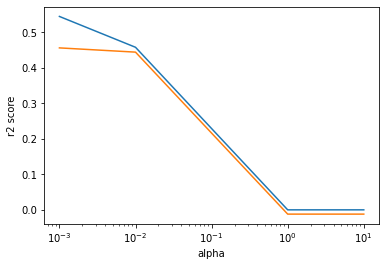

In [1633]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()


In [1634]:

print( model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
0.4552954641575627


In [1635]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train_5, y_train_5)



Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1643]:
test_5= master_test_5.copy()

In [1644]:
cols30_5 = list(X_train_5.columns)

cols30_5.remove('const')



yTest = test_5.pop('SalePrice')
XTest = test_5

In [1646]:
y_test_5 = yTest
X_test_5 = sm.add_constant(XTest[cols30_5])

In [1649]:

# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print('The Lasso model parameters are - ')
list(zip(cols, model_parameters))
#print(coefflist)

The Lasso model parameters are - 


[('constant', -0.516),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.092),
 ('LotArea', -0.036),
 ('OverallQual', 0.0),
 ('OverallCond', 0.548),
 ('MasVnrArea', -2.241),
 ('BsmtFinSF1', -0.195),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', -0.0),
 ('1stFlrSF', -0.0),
 ('2ndFlrSF', 0.363),
 ('LowQualFinSF', 0.05),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', -1.201),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', -0.0),
 ('BedroomAbvGr', 0.416),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0),
 ('GarageYrBlt', -0.906),
 ('GarageCars', -0.0),
 ('GarageArea', -0.198),
 ('WoodDeckSF', 0.906),
 ('OpenPorchSF', 0.446),
 ('EnclosedPorch', 0.287),
 ('3SsnPorch', -7.196),
 ('ScreenPorch', 0.592),
 ('PoolArea', 0.0)]